# BANGKIT 2023 DESIGN CAPSTONE : PETME!


Pet Animals Classification with Deep Learning and Tensorflow JS

In [1]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 38.5 MB/s eta 0:00:00


Import Library

In [3]:
import os
import numpy as np
import tensorflow as tf
import tensorflowjs as tfjs
import matplotlib.pyplot as plt

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [4]:
print (tf.__version__)

2.14.0


Pre-trained Model

In [5]:
# Initialize pre-trained models
pre_trained_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezes pre-trained coating weights
for layer in pre_trained_model.layers:
    layer.trainable = False

# Added a Dense layer for multiclass classification
x = Flatten()(pre_trained_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
outputs = Dense(8, activation='softmax')(x)

# Build the final model
model = Model(inputs=pre_trained_model.input, outputs=outputs)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Set the training parameters

In [7]:
from keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Prepare the Dataset from Google Drive

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import zipfile
dataset = '/content/drive/MyDrive/Capstone/dataset_pet.zip'
zip_ref = zipfile.ZipFile(dataset, 'r')
zip_ref.extractall()
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/Capstone/dataset_pet.zip' mode='r'>>

In [11]:
os.listdir('dataset')

['test', 'valid', 'train']

In [16]:
# Specify the path to the dataset directory
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'valid')

In [17]:
# Specify the path Train
train_cat_dir = os.path.join(train_dir, 'cat')
train_dog_dir = os.path.join(train_dir, 'dog')
train_hamster_dir = os.path.join(train_dir, 'hamster')
train_iguana_dir = os.path.join(train_dir, 'iguana')
train_mouse_dir = os.path.join(train_dir, 'mouse')
train_rabbit_dir = os.path.join(train_dir, 'rabbit')
train_seaturtle_dir = os.path.join(train_dir, 'sea_turtle')
train_turtle_dir = os.path.join(train_dir, 'turtle')


In [18]:
# Specify the path Test
test_cat_dir = os.path.join(test_dir, 'cat')
test_dog_dir = os.path.join(test_dir, 'dog')
test_hamster_dir = os.path.join(test_dir, 'hamster')
test_iguana_dir = os.path.join(test_dir, 'iguana')
test_mouse_dir = os.path.join(test_dir, 'mouse')
test_rabbit_dir = os.path.join(test_dir, 'rabbit')
test_seaturtle_dir = os.path.join(test_dir, 'sea_turtle')
test_turtle_dir = os.path.join(test_dir, 'turtle')

In [20]:
# Specify the path Validation
val_cat_dir = os.path.join(val_dir, 'cat')
val_dog_dir = os.path.join(val_dir, 'dog')
val_hamster_dir = os.path.join(val_dir, 'hamster')
val_iguana_dir = os.path.join(val_dir, 'iguana')
val_mouse_dir = os.path.join(val_dir, 'mouse')
val_rabbit_dir = os.path.join(val_dir, 'rabbit')
val_seaturtle_dir = os.path.join(val_dir, 'sea_turtle')
val_turtle_dir = os.path.join(val_dir, 'turtle')


Preprocess the images

In [21]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 0.2,
    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
# Load and process the training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['cat', 'dog', 'hamster', 'iguana', 'mouse', 'rabbit', 'seaturtle', 'turtle']
)

Found 724 images belonging to 8 classes.


In [23]:
# Load and process the testing dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['cat', 'dog', 'hamster', 'iguana', 'mouse', 'rabbit', 'seaturtle', 'turtle']
)

Found 49 images belonging to 8 classes.


In [24]:
# Load and process the validation dataset
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['cat', 'dog', 'hamster', 'iguana', 'mouse', 'rabbit', 'seaturtle', 'turtle']
)

Found 62 images belonging to 8 classes.


Train Model

In [25]:
# Setting Callbacks
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') >= 0.90:
            print("\nReached 90% accuracy, so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [26]:
train = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/100
22/22 [==============================] - 27s 587ms/step - loss: 1.4400 - accuracy: 0.5072 - val_loss: 1.4497 - val_accuracy: 0.4375
Epoch 2/100
22/22 [==============================] - 12s 531ms/step - loss: 0.8284 - accuracy: 0.7673 - val_loss: 1.0455 - val_accuracy: 0.6250
Epoch 3/100
22/22 [==============================] - 10s 474ms/step - loss: 0.5855 - accuracy: 0.8454 - val_loss: 0.7754 - val_accuracy: 0.7812
Epoch 4/100
22/22 [==============================] - 11s 463ms/step - loss: 0.4630 - accuracy: 0.8671 - val_loss: 0.6382 - val_accuracy: 0.8438
Epoch 5/100
22/22 [==============================] - 11s 507ms/step - loss: 0.3545 - accuracy: 0.9205 - val_loss: 0.3612 - val_accuracy: 0.8750
Epoch 6/100
22/22 [==============================] - 11s 510ms/step - loss: 0.2996 - accuracy: 0.9335 - val_loss: 0.5062 - val_accuracy: 0.8750
Epoch 7/100
22/22 [==============================] - 10s 446ms/step - loss: 0.2625 - accuracy: 0.9335 - val_loss: 0.4470 - val_accuracy:

Evaluate and Visualize Training Result

In [27]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(validation_generator)
print("Loss:", loss)
print("Accuracy:", accuracy)


2/2 [==============================] - 5s 5s/step - loss: 0.3663 - accuracy: 0.9032
Loss: 0.3663466274738312
Accuracy: 0.9032257795333862


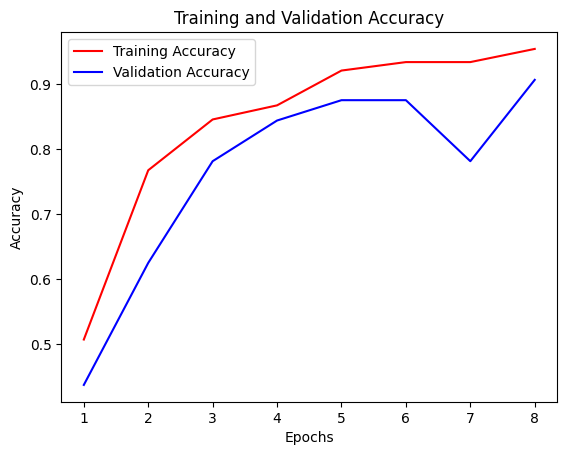

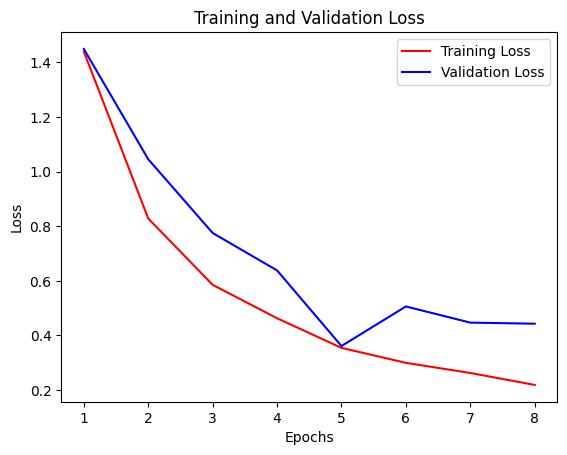

In [28]:
# Plot accuracy and loss
epochs = range(1, len(train.history['accuracy']) + 1)

plt.plot(epochs, train.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(epochs, train.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train.history['loss'], 'r', label='Training Loss')
plt.plot(epochs, train.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Save and Load the Model

In [29]:
# Save the model to a file
model.save('example_waste_classification_model.h5')

# Load the model from the file
loaded_model = tf.keras.models.load_model('example_waste_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Testing the Model

In [31]:
from PIL import Image
import numpy as np

# Path to the folder containing testing images
test_folder = test_dir

# List all class folders in the testing folder
class_folders = ['cat', 'dog', 'hamster', 'iguana', 'mouse', 'rabbit', 'sea_turtle', 'turtle']

# Iterate through each class folder
for class_folder in class_folders:
    # Path to the current class folder
    class_path = os.path.join(test_folder, class_folder)

    # List all image files in the class folder
    test_images = os.listdir(class_path)

    # Iterate through each image file
    for image_file in test_images:
        # Load and preprocess the image
        image_path = os.path.join(class_path, image_file)
        image = Image.open(image_path)
        image = image.resize((224, 224))
        image = np.array(image)
        image = image / 255.0

        # Reshape the image to match the model's input shape
        image = np.expand_dims(image, axis=0)

        try:
            # Perform inference using the model
            predictions = model.predict(image)
            predicted_class = np.argmax(predictions, axis=1)[0]

            # Display the predicted class or perform further processing
            print("Predicted class for", image_file, ": ", predicted_class)
        except Exception as e:
            print("Error occurred during inference:", str(e))

1/1 [==============================] - 0s 124ms/step
Predicted class for 76.jpg :  0
1/1 [==============================] - 0s 20ms/step
Predicted class for 61.jpg :  0
1/1 [==============================] - 0s 21ms/step
Predicted class for 037.jpg :  0
1/1 [==============================] - 0s 18ms/step
Predicted class for 12.jpg :  0
1/1 [==============================] - 0s 17ms/step
Predicted class for 069.jpg :  0
1/1 [==============================] - 0s 20ms/step
Predicted class for 38.jpg :  0
1/1 [==============================] - 0s 18ms/step
Predicted class for 001.jpg :  0
1/1 [==============================] - 0s 18ms/step
Predicted class for 062.jpg :  1
1/1 [==============================] - 0s 20ms/step
Predicted class for 001.jpg :  1
1/1 [==============================] - 0s 19ms/step
Predicted class for 044.jpg :  1
1/1 [==============================] - 0s 22ms/step
Predicted class for 049.jpg :  1
1/1 [==============================] - 0s 21ms/step
Predicted class 

Save and Convert to JSON


In [32]:
tfjs.converters.save_keras_model(model,"/content")

In [33]:
!waste model.json

/bin/bash: line 1: waste: command not found


In [36]:
from google.colab import files

In [37]:
files.download('model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>